##Preprocessing

In [ ]:
#initial_libraries
import pandas as pd
import numpy as np
from numpy import nan as NA
import random
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from math import radians, sin, cos, asin, sqrt
import folium
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

In [ ]:
initial_data5 = pd.read_csv('/content/drive/MyDrive/Daft/cleaned_data.csv')
initial_data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10939 entries, 0 to 10938
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               8827 non-null   float64
 1   id                       10939 non-null  object 
 2   title                    10939 non-null  object 
 3   seoTitle                 10939 non-null  object 
 4   sections                 10939 non-null  object 
 5   saleType                 10939 non-null  object 
 6   featuredLevel            10939 non-null  object 
 7   featuredLevelFull        10939 non-null  object 
 8   publishDate              10939 non-null  object 
 9   price                    10939 non-null  object 
 10  abbreviatedPrice         10939 non-null  object 
 11  numBedrooms              10930 non-null  float64
 12  shared_or_not            10939 non-null  int64  
 13  propertyType             10938 non-null  object 
 14  daftShortcode         

In [ ]:
initial_data5['featuredLevel'].value_counts()

,count
featuredLevel,
STANDARD,9110
PREMIUM,793
LITE,551
FEATURED,483
BASIC,2


In [ ]:
#defining the columns of interest + encoding the rest of 'object' type values
initial_data5 = initial_data5[['Sale_Type', 'featuredLevel', 'numBedrooms', 'shared_or_not', 'number_of_posts', 'propertySize_m', 'cleaned_price_per_month', 'sph_dist', 'days_on_site', 'Ber_Rating', 'is_commercial', 'sections_2', 'to_monitor_km', 'max_noise', 'latitude', 'longitude']]
initial_data5 = initial_data5.dropna()
label_encoder = LabelEncoder()
initial_data5['featuredLevel'] = label_encoder.fit_transform(initial_data5['featuredLevel'])
initial_data5['sections_2'] = label_encoder.fit_transform(initial_data5['sections_2'])
initial_data5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10928 entries, 0 to 10938
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sale_Type                10928 non-null  int64  
 1   featuredLevel            10928 non-null  int64  
 2   numBedrooms              10928 non-null  float64
 3   shared_or_not            10928 non-null  int64  
 4   number_of_posts          10928 non-null  int64  
 5   propertySize_m           10928 non-null  float64
 6   cleaned_price_per_month  10928 non-null  float64
 7   sph_dist                 10928 non-null  float64
 8   days_on_site             10928 non-null  int64  
 9   Ber_Rating               10928 non-null  float64
 10  is_commercial            10928 non-null  int64  
 11  sections_2               10928 non-null  int64  
 12  to_monitor_km            10928 non-null  float64
 13  max_noise                10928 non-null  float64
 14  latitude                 10

In [ ]:
initial_data5['featuredLevel'].value_counts()

,count
featuredLevel,
4,9102
3,791
2,550
1,483
0,2


In [ ]:
#define more accurate dataset - distance till the monitor is less than 2 km)
initial_data52 = initial_data5[initial_data5['to_monitor_km'] <= 2].copy()
initial_data52

,Sale_Type,featuredLevel,numBedrooms,shared_or_not,number_of_posts,propertySize_m,cleaned_price_per_month,sph_dist,days_on_site,Ber_Rating,is_commercial,sections_2,to_monitor_km,max_noise,latitude,longitude
0,0,4,2.0,0,61,68.0,330000.0,3.40,295,7.0,0,1,1.26,53.05,53.363526,-6.243259
6,0,4,4.0,0,27,144.0,875000.0,4.97,260,2.0,0,5,1.64,53.05,53.377238,-6.237479
12,0,4,3.0,0,50,101.0,775000.0,7.60,255,3.0,0,5,1.12,58.45,53.372804,-6.342077
14,0,4,5.0,0,34,250.0,2000000.0,1.15,254,8.0,0,5,0.55,58.20,53.323702,-6.256045
15,1,4,3.0,0,1,10.0,750.0,0.65,254,8.0,0,5,1.01,58.20,53.331193,-6.239699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10926,1,4,3.0,0,2,20.0,850.0,5.31,-1,8.0,0,5,1.04,61.00,53.328041,-6.328471
10927,1,4,3.0,0,2,20.0,950.0,0.76,-1,6.0,0,5,1.55,76.90,53.339663,-6.252037
10930,1,4,3.0,0,3,20.0,790.0,6.38,-1,8.0,0,5,0.70,58.45,53.373875,-6.316435
10934,0,4,0.0,0,16,60.0,100000.0,0.96,52,7.0,1,12,0.52,58.20,53.325267,-6.254996


##Features and the number of clusters defining

###At first for non-normalised data only

In [ ]:
features = initial_data5.columns
features

Index(['Sale_Type', 'featuredLevel', 'numBedrooms', 'shared_or_not',
       'number_of_posts', 'propertySize_m', 'cleaned_price_per_month',
       'sph_dist', 'days_on_site', 'Ber_Rating', 'is_commercial', 'sections_2',
       'to_monitor_km', 'max_noise', 'latitude', 'longitude'],
      dtype='object')

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca_result = pca.fit_transform(initial_data52)

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[9.99793374e-01 2.06540017e-04 8.24532264e-08 3.34734904e-09
 3.96451418e-10 8.43249411e-11 5.48982283e-11 2.95586348e-11
 6.73891245e-12 3.25542563e-12 1.23782627e-12 5.43507466e-13
 2.29787458e-13 1.54530497e-13 8.83639516e-15 1.27507188e-15]


In [ ]:
#PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=None)  # Retain all components initially
pca_result = pca.fit_transform(initial_data5)

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[9.99907108e-01 9.27820933e-05 1.05095166e-07 3.94316864e-09
 2.89699788e-10 2.49767529e-10 6.56663041e-11 5.44479132e-11
 1.26887349e-11 7.04029259e-12 3.43825199e-12 5.42272702e-13
 1.57346321e-13 1.22175990e-13 3.32156215e-14 1.36591591e-14]


In [ ]:
 # Get the PCA components (loadings)
components = pca.components_

# Create a DataFrame for better readability
pc_contributions = pd.DataFrame(
    components,
    columns=initial_data5.columns,  # Original feature names
    index=[f"PC{i+1}" for i in range(len(components))]
)

pc_contributions
#So, PC1 - cleaned_price_per_month

,Sale_Type,featuredLevel,numBedrooms,shared_or_not,number_of_posts,propertySize_m,cleaned_price_per_month,sph_dist,days_on_site,Ber_Rating,is_commercial,sections_2,to_monitor_km,max_noise,latitude,longitude
PC1,-8.946625e-07,2.882931e-08,0.000001,-4.780968e-08,0.000014,7.210353e-05,1.000000e+00,3.433518e-07,0.000016,0.000002,-5.927438e-08,5.974100e-08,6.262408e-07,4.999466e-07,-7.372069e-09,3.488921e-08
PC2,9.555671e-07,7.642333e-07,-0.000007,-1.938280e-07,-0.000144,1.000000e+00,-7.210328e-05,-1.489140e-06,0.000113,0.000002,2.893032e-06,-5.627298e-07,-5.702371e-06,-1.084802e-05,-5.026383e-08,-1.923810e-07
PC3,-6.917975e-04,-2.779184e-04,0.000003,-1.624313e-05,0.999990,1.442484e-04,-1.422250e-05,2.702170e-03,-0.002026,0.002350,-4.338792e-06,6.178815e-04,-4.031563e-04,-1.665512e-03,-1.107780e-05,-1.397599e-04
PC4,-7.244768e-04,5.076133e-05,-0.005195,-2.174784e-04,0.002013,-1.124459e-04,-1.615105e-05,1.263107e-03,0.999861,0.003746,1.733687e-03,1.436260e-02,1.323595e-03,4.475941e-03,5.426845e-05,1.167464e-04
PC5,-2.495537e-03,-1.655106e-03,0.012443,3.273781e-04,0.000265,1.210119e-05,-6.640626e-07,4.860977e-01,-0.004181,-0.046165,-2.225872e-03,-1.616497e-02,3.544455e-01,7.971716e-01,2.911078e-03,2.746384e-03
PC6,-4.872372e-03,-2.441728e-03,0.041114,-2.148340e-03,-0.002361,-2.986678e-06,-1.394917e-07,6.379084e-01,0.001940,-0.072699,-6.086915e-03,-1.187215e-02,4.708510e-01,-6.034598e-01,2.976622e-03,-1.602662e-03
PC7,1.015676e-02,2.173622e-02,-0.099882,-2.866326e-03,-0.001685,3.509146e-07,-4.287723e-07,3.856646e-02,-0.015128,0.440514,6.121629e-02,8.874637e-01,4.824518e-02,2.616708e-04,8.972251e-04,7.134113e-04
PC8,-4.114268e-02,2.373393e-02,0.064135,-4.950302e-04,-0.002000,-2.185168e-06,-1.603604e-06,5.825396e-02,0.003231,0.892417,-3.645215e-02,-4.375370e-01,3.138486e-02,-7.837802e-03,7.941644e-04,5.303520e-04
PC9,2.306390e-02,2.698842e-02,-0.198309,-1.120183e-03,0.001912,2.424173e-06,-7.997353e-08,-5.725892e-01,-0.000758,0.003196,2.826948e-02,-4.499692e-02,7.924778e-01,-6.655650e-04,-1.320238e-02,2.279270e-02
PC10,5.456436e-02,-7.635412e-02,0.956956,1.328423e-02,0.000453,7.861425e-06,-1.106977e-06,-1.513297e-01,0.003477,-0.005830,-1.315971e-01,1.198572e-01,1.423984e-01,1.578469e-02,-7.756927e-03,5.899278e-03


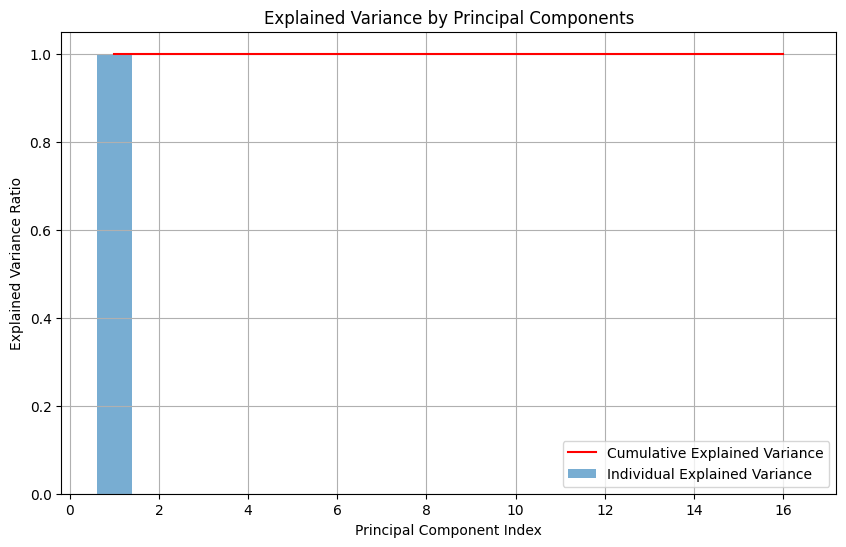

In [ ]:
cumulative_variance = explained_variance_ratio.cumsum()
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.6, label='Individual Explained Variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative Explained Variance', color='red')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.grid()
plt.show()

In [ ]:
num_components = sum(cumulative_variance < 0.95) + 1
print(f"Number of components to retain: {num_components}")

Number of components to retain: 1


###Now for normalised data

In [ ]:
initial_data5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10928 entries, 0 to 10938
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sale_Type                10928 non-null  int64  
 1   featuredLevel            10928 non-null  int64  
 2   numBedrooms              10928 non-null  float64
 3   shared_or_not            10928 non-null  int64  
 4   number_of_posts          10928 non-null  int64  
 5   propertySize_m           10928 non-null  float64
 6   cleaned_price_per_month  10928 non-null  float64
 7   sph_dist                 10928 non-null  float64
 8   days_on_site             10928 non-null  int64  
 9   Ber_Rating               10928 non-null  float64
 10  is_commercial            10928 non-null  int64  
 11  sections_2               10928 non-null  int64  
 12  to_monitor_km            10928 non-null  float64
 13  max_noise                10928 non-null  float64
 14  latitude                 10

In [ ]:
initial_data52.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4877 entries, 0 to 10935
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sale_Type                4877 non-null   int64  
 1   featuredLevel            4877 non-null   int64  
 2   numBedrooms              4877 non-null   float64
 3   shared_or_not            4877 non-null   int64  
 4   number_of_posts          4877 non-null   int64  
 5   propertySize_m           4877 non-null   float64
 6   cleaned_price_per_month  4877 non-null   float64
 7   sph_dist                 4877 non-null   float64
 8   days_on_site             4877 non-null   int64  
 9   Ber_Rating               4877 non-null   float64
 10  is_commercial            4877 non-null   int64  
 11  sections_2               4877 non-null   int64  
 12  to_monitor_km            4877 non-null   float64
 13  max_noise                4877 non-null   float64
 14  latitude                 487

In [ ]:

scaler = StandardScaler()
scaled_data = scaler.fit_transform(initial_data5)
scaled_data2 = scaler.fit_transform(initial_data52)

In [ ]:
pca = PCA(n_components=None)  # Retain all components initially
pca_result = pca.fit_transform(scaled_data)
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.16518957 0.13101571 0.12069785 0.08573413 0.0653094  0.06479523
 0.06242388 0.05804696 0.05223054 0.04942845 0.04290902 0.04085717
 0.03802406 0.0126593  0.00712299 0.00355572]


In [ ]:
cumulative_variance = np.cumsum(explained_variance_ratio)
print(cumulative_variance)
#PC1-13 explains ~ 98% of variation
#PC1-9 explains ~ 81% of variation
#PC1-7 explains ~ 70% of variation

[0.16518957 0.29620529 0.41690314 0.50263727 0.56794667 0.6327419
 0.69516578 0.75321274 0.80544328 0.85487173 0.89778075 0.93863792
 0.97666198 0.98932129 0.99644428 1.        ]


In [ ]:
pca = PCA(n_components=None)  # Retain all components initially
pca_result = pca.fit_transform(scaled_data2)
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.15842225 0.1309209  0.10272349 0.07958599 0.07725244 0.06454556
 0.06285203 0.05873523 0.05479048 0.05099821 0.04567445 0.04457536
 0.03509909 0.01346286 0.01287903 0.00748261]


In [ ]:
cumulative_variance = np.cumsum(explained_variance_ratio)
print(cumulative_variance)
#PC1-13 explains ~ 97% of variation
#PC1-9 explains ~ 78% of variation
#PC1-7 explains ~ 73% of variation

[0.15842225 0.28934315 0.39206665 0.47165264 0.54890508 0.61345064
 0.67630267 0.7350379  0.78982838 0.84082659 0.88650104 0.93107641
 0.9661755  0.97963836 0.99251739 1.        ]


In [ ]:

components = pca.components_

pc_contributions = pd.DataFrame(
    components,
    columns=initial_data5.columns,
    index=[f"PC{i+1}" for i in range(len(components))]
)

pc_contributions
#So, PC1 - numBedrooms, PC2 - sph_dist, PC3 - is_commercial, PC4 - longitude, PC5 - featuredLevel, PC6 - shared_or_not, PC7 - propertySize_m
#OR, PC1 - is_commercial, PC2 - to_monitor_km, PC3 - sections_2/cleaned_price_per_month, PC4 - max_noise, PC5 - featuredLevel, PC6 - shared_or_not, PC7 - propertySize_m

,Sale_Type,featuredLevel,numBedrooms,shared_or_not,number_of_posts,propertySize_m,cleaned_price_per_month,sph_dist,days_on_site,Ber_Rating,is_commercial,sections_2,to_monitor_km,max_noise,latitude,longitude
PC1,-0.364425,-0.033652,0.431010,-0.058265,0.060929,-0.014250,0.316224,0.383075,0.062755,0.055668,-0.402826,-0.279614,0.361803,0.041359,0.197184,0.085165
PC2,0.347018,-0.037902,-0.149015,0.050487,-0.109448,-0.002271,-0.348789,0.469085,-0.118594,-0.303796,0.145934,0.121694,0.454162,0.103732,0.369123,0.063021
PC3,-0.295480,0.117553,-0.221731,-0.206006,0.075575,0.029564,0.330911,0.125158,0.331244,0.247223,0.462895,0.452165,0.153885,0.114047,0.130520,0.179524
PC4,0.087758,0.074912,0.017104,0.143089,-0.504611,-0.017479,0.083758,-0.198108,0.067465,-0.026859,-0.069167,-0.124774,-0.069464,0.474648,0.004644,0.639498
PC5,-0.033741,0.673853,-0.069581,0.216504,0.201515,-0.156633,-0.157464,0.035503,-0.359919,0.450849,-0.051151,-0.060348,-0.012239,0.177745,0.173768,-0.029455
PC6,0.062863,0.512064,0.048439,-0.481464,-0.490064,0.182272,-0.000573,0.017500,-0.011663,-0.049288,-0.037499,-0.037682,0.078865,-0.457166,-0.073323,-0.002227
PC7,-0.012474,0.037161,-0.028467,0.190689,0.094729,0.962866,-0.026758,0.010958,0.012776,0.064759,-0.008300,-0.067325,-0.018389,0.106165,0.053635,-0.030427
PC8,0.050795,0.165210,0.183376,0.729127,-0.241991,-0.077197,0.103516,0.031412,0.380493,-0.009506,0.027778,0.184581,0.023342,-0.358698,0.065103,-0.124484
PC9,-0.008455,0.390248,-0.180652,-0.072495,0.235587,-0.066746,-0.106959,0.019165,0.595227,-0.400451,-0.069314,-0.299671,-0.018125,0.288824,-0.111145,-0.180598
PC10,-0.012247,-0.226930,-0.221490,-0.132734,-0.139695,-0.036300,-0.262825,-0.076986,0.347300,0.383240,-0.107066,-0.280126,-0.212327,-0.157533,0.597796,-0.034021


###Now only for specific columns for scaled data

In [ ]:
initial_data55 = initial_data5.copy()
initial_data55 = initial_data55[['is_commercial', 'to_monitor_km', 'sph_dist', 'cleaned_price_per_month', 'sections_2', 'featuredLevel', 'max_noise', 'propertySize_m', 'Sale_Type']]
initial_data55.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10928 entries, 0 to 10938
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   is_commercial            10928 non-null  int64  
 1   to_monitor_km            10928 non-null  float64
 2   sph_dist                 10928 non-null  float64
 3   cleaned_price_per_month  10928 non-null  float64
 4   sections_2               10928 non-null  int64  
 5   featuredLevel            10928 non-null  int64  
 6   max_noise                10928 non-null  float64
 7   propertySize_m           10928 non-null  float64
 8   Sale_Type                10928 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 853.8 KB


In [ ]:
initial_data552 = initial_data52.copy()
initial_data552 = initial_data552[['is_commercial', 'to_monitor_km', 'sph_dist', 'cleaned_price_per_month', 'sections_2', 'featuredLevel', 'max_noise', 'propertySize_m', 'Sale_Type']]
initial_data552.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4877 entries, 0 to 10935
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   is_commercial            4877 non-null   int64  
 1   to_monitor_km            4877 non-null   float64
 2   sph_dist                 4877 non-null   float64
 3   cleaned_price_per_month  4877 non-null   float64
 4   sections_2               4877 non-null   int64  
 5   featuredLevel            4877 non-null   int64  
 6   max_noise                4877 non-null   float64
 7   propertySize_m           4877 non-null   float64
 8   Sale_Type                4877 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 381.0 KB


In [ ]:
scaled_data55 = scaler.fit_transform(initial_data55)
pca = PCA(n_components=None)  # Retain all components initially
pca_result = pca.fit_transform(scaled_data55)
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.23653293 0.19142565 0.17071194 0.11137586 0.10990047 0.10976948
 0.03214837 0.02775284 0.01038246]


In [ ]:
cumulative_variance = np.cumsum(explained_variance_ratio)
print(cumulative_variance)
#PC1-8 explains ~ 99% of variation
#PC1-6 explains ~ 93% of variation
#PC1-5 explains ~ 82% of variation

[0.23653293 0.42795858 0.59867051 0.71004637 0.81994685 0.92971632
 0.9618647  0.98961754 1.        ]


In [ ]:
scaled_data552 = scaler.fit_transform(initial_data552)
pca = PCA(n_components=None)  # Retain all components initially
pca_result = pca.fit_transform(scaled_data552)
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.21480485 0.17711605 0.13879714 0.11146909 0.10956943 0.10497258
 0.08696112 0.02903217 0.02727757]


In [ ]:
cumulative_variance = np.cumsum(explained_variance_ratio)
print(cumulative_variance)
#PC1-8 explains ~ 97% of variation
#PC1-6 explains ~ 85% of variation
#PC1-5 explains ~ 75% of variation

[0.21480485 0.3919209  0.53071804 0.64218713 0.75175656 0.85672914
 0.94369026 0.97272243 1.        ]


In [ ]:
# Get the PCA components (loadings)
components = pca.components_

# Create a DataFrame for better readability
pc_contributions = pd.DataFrame(
    components,
    columns=initial_data55.columns,  # Original feature names
    index=[f"PC{i+1}" for i in range(len(components))]
)

pc_contributions
#So, PC1 - sph_dist, PC2 - to_monitor_km, PC3 - cleaned_price_per_month, PC4 - propertySize_m, PC5 - featuredLevel, PC6 - max_noise, PC7 - 	is_commercial, PC8 - Sale_Type, PC9 - sections2_
#OR, PC1 - is_commercial, PC2 - to_monitor_km, PC3 - sections_2/cleaned_price_per_month, PC4 - max_noise, PC5 - featuredLevel, PC6 - shared_or_not, PC7 - propertySize_m

,is_commercial,to_monitor_km,sph_dist,cleaned_price_per_month,sections_2,featuredLevel,max_noise,propertySize_m,Sale_Type
PC1,-0.388557,0.479290,0.488888,0.325835,-0.318979,-0.033136,0.064001,-0.013533,-0.408655
PC2,0.361318,0.511518,0.501039,-0.295886,0.392351,0.010157,0.091154,0.010303,0.326730
PC3,0.447399,-0.029667,-0.052910,0.566731,0.490258,0.140505,0.042931,0.035989,-0.460150
PC4,-0.008156,0.033763,0.035859,-0.014314,-0.025397,0.079711,-0.400663,0.910918,-0.000716
PC5,-0.052914,-0.006969,-0.017390,-0.080442,-0.125087,0.908065,0.376846,0.082040,0.037504
PC6,0.028981,-0.071468,-0.060571,0.027559,-0.043352,-0.382810,0.824748,0.400792,0.018907
PC7,0.610732,-0.008320,0.040701,-0.391625,-0.512516,-0.036608,-0.027269,-0.025416,-0.454431
PC8,0.369374,0.191555,-0.111926,0.552104,-0.466897,0.004561,-0.046133,-0.023996,0.537408
PC9,0.071898,-0.681683,0.698361,0.139551,-0.071577,0.014736,-0.011264,-0.007524,0.132030


###Now for another specific columns for scaled data

In [ ]:
initial_data555 = initial_data55.copy()
initial_data555 = initial_data555[['is_commercial', 'cleaned_price_per_month', 'featuredLevel', 'max_noise', 'propertySize_m', 'Sale_Type']]
initial_data555.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10928 entries, 0 to 10938
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   is_commercial            10928 non-null  int64  
 1   cleaned_price_per_month  10928 non-null  float64
 2   featuredLevel            10928 non-null  int64  
 3   max_noise                10928 non-null  float64
 4   propertySize_m           10928 non-null  float64
 5   Sale_Type                10928 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 597.6 KB


In [ ]:
initial_data5552 = initial_data552.copy()
initial_data5552 = initial_data5552[['is_commercial', 'cleaned_price_per_month', 'featuredLevel', 'max_noise', 'propertySize_m', 'Sale_Type']]
initial_data5552.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4877 entries, 0 to 10935
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   is_commercial            4877 non-null   int64  
 1   cleaned_price_per_month  4877 non-null   float64
 2   featuredLevel            4877 non-null   int64  
 3   max_noise                4877 non-null   float64
 4   propertySize_m           4877 non-null   float64
 5   Sale_Type                4877 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 266.7 KB


In [ ]:
scaled_data555 = scaler.fit_transform(initial_data555)
pca = PCA(n_components=None)  # Retain all components initially
pca_result = pca.fit_transform(scaled_data555)
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.2956944  0.17848105 0.16766974 0.16549798 0.14870473 0.0439521 ]


In [ ]:
cumulative_variance = np.cumsum(explained_variance_ratio)
print(cumulative_variance)
#PC1-5 explains ~ 95% of variation
#PC1-4 explains ~ 80% of variation

[0.2956944  0.47417545 0.6418452  0.80734317 0.9560479  1.        ]


In [ ]:
# Get the PCA components (loadings)
components = pca.components_

# Create a DataFrame for better readability
pc_contributions = pd.DataFrame(
    components,
    columns=initial_data555.columns,  # Original feature names
    index=[f"PC{i+1}" for i in range(len(components))]
)

pc_contributions
#So, PC1 - 	cleaned_price_per_month/Sale_Type, PC2 - featuredLevel, PC3 - max_noise, PC4 - propertySize_m, PC5 - is_commercial, PC6 - cleaned_price_per_month/Sale_Type,
#OR, PC1 - cleaned_price_per_month, PC2 - is_commercial, PC3 - max_noise, PC4 - propertySize_m, PC5 - featuredLevel, PC6 - shared_or_not

,is_commercial,cleaned_price_per_month,featuredLevel,max_noise,propertySize_m,Sale_Type
PC1,0.238351,-0.676946,-0.022712,-0.023764,0.006227,0.695567
PC2,0.608958,0.136208,0.635197,0.314351,0.325675,-0.047546
PC3,0.029365,0.001128,-0.076428,0.763490,-0.640284,0.020356
PC4,0.015209,0.027398,-0.589812,0.482374,0.646753,0.012885
PC5,0.746602,0.213279,-0.491446,-0.291151,-0.256185,-0.071971
PC6,-0.117690,0.690617,0.027753,-0.015762,-0.003625,0.712857


PC1 - cleaned_price_per_month, PC2 - is_commercial, PC3 - max_noise, PC4 - propertySize_m could be used to describe 80% of the variance used                
OR                                    
 PC1 - cleaned_price_per_month, PC2 - is_commercial, PC3 - max_noise, PC4 - propertySize_m, PC5 - featuredLevel for 95%


###Model clusters detection

In [ ]:
cluster_data = initial_data555[['is_commercial', 'cleaned_price_per_month', 'featuredLevel', 'max_noise', 'propertySize_m']].copy()
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10928 entries, 0 to 10938
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   is_commercial            10928 non-null  int64  
 1   cleaned_price_per_month  10928 non-null  float64
 2   featuredLevel            10928 non-null  int64  
 3   max_noise                10928 non-null  float64
 4   propertySize_m           10928 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 512.2 KB


In [ ]:
cluster_data2 = initial_data5552[['is_commercial', 'cleaned_price_per_month', 'featuredLevel', 'max_noise', 'propertySize_m']].copy()
cluster_data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4877 entries, 0 to 10935
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   is_commercial            4877 non-null   int64  
 1   cleaned_price_per_month  4877 non-null   float64
 2   featuredLevel            4877 non-null   int64  
 3   max_noise                4877 non-null   float64
 4   propertySize_m           4877 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 228.6 KB


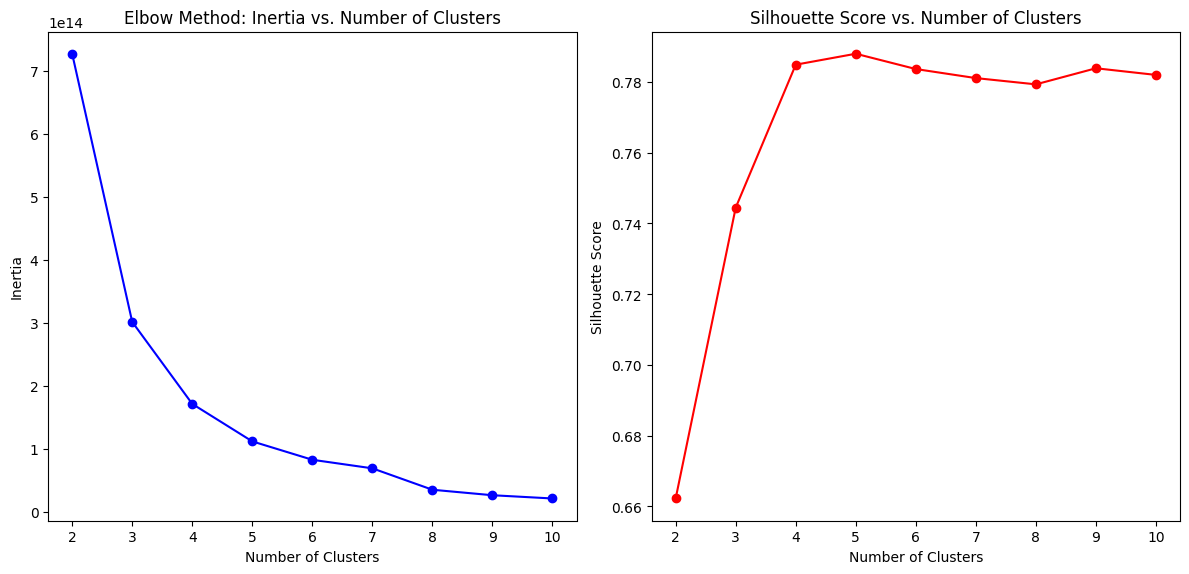

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

X_pca = cluster_data

inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o', color='b')
plt.title("Elbow Method: Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")


plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='r')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

Cluster Centers (Centroids):
[[1.71706639e-01 2.76671471e+03 3.66962113e+00 6.62484446e+01
  1.43446124e+02]
 [2.71604938e-02 3.78461943e+05 3.73024691e+00 6.63453241e+01
  9.50250000e+01]
 [1.01736973e-01 1.36887097e+06 3.70223325e+00 6.74194789e+01
  2.46677419e+02]
 [4.78536242e-02 7.37714046e+05 3.70795215e+00 6.60178395e+01
  1.43308234e+02]
 [2.90909091e-01 2.26568182e+06 3.65454545e+00 6.81136364e+01
  4.75400000e+02]]


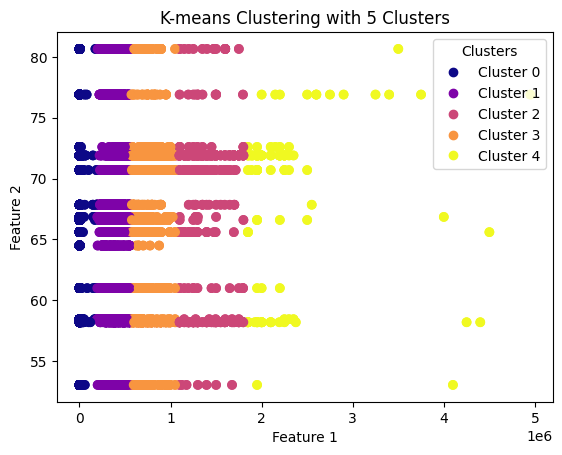

Cluster Distribution:
cluster_label
0    5754
1    3240
3    1421
2     403
4     110
Name: count, dtype: int64


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_data['cluster_label'] = kmeans.fit_predict(cluster_data)
print("Cluster Centers (Centroids):")
print(kmeans.cluster_centers_)

plt.scatter(cluster_data['cleaned_price_per_month'], cluster_data['max_noise'], c=cluster_data['cluster_label'], cmap='plasma')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering with 5 Clusters')
handles, labels = plt.scatter(cluster_data['cleaned_price_per_month'], cluster_data['max_noise'], c=cluster_data['cluster_label'], cmap='plasma').legend_elements()
plt.legend(handles=handles, labels=[f'Cluster {i}' for i in range(5)], title="Clusters")
plt.show()

print("Cluster Distribution:")
print(cluster_data['cluster_label'].value_counts())

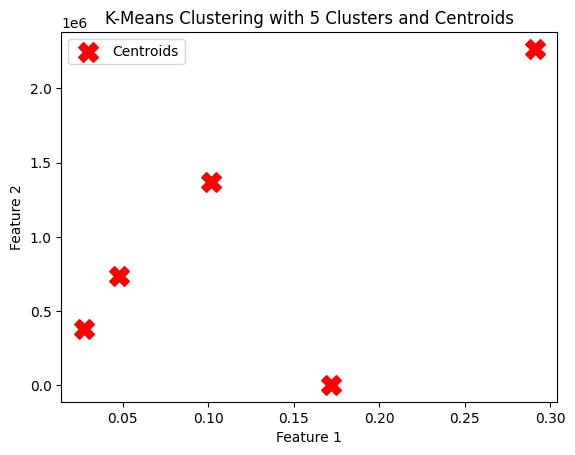

In [ ]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')  # Cluster centroids

# Customize the plot
plt.title('K-Means Clustering with 5 Clusters and Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

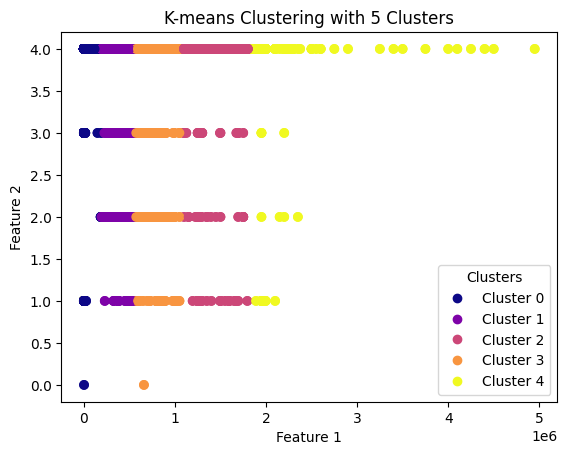

Cluster Distribution:
cluster_label
0    5754
1    3240
3    1421
2     403
4     110
Name: count, dtype: int64


In [ ]:

plt.scatter(cluster_data['cleaned_price_per_month'], cluster_data['featuredLevel'], c=cluster_data['cluster_label'], cmap='plasma')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering with 5 Clusters')
handles, labels = plt.scatter(cluster_data['cleaned_price_per_month'], cluster_data['featuredLevel'], c=cluster_data['cluster_label'], cmap='plasma').legend_elements()
plt.legend(handles=handles, labels=[f'Cluster {i}' for i in range(5)], title="Clusters")
plt.show()

print("Cluster Distribution:")
print(cluster_data['cluster_label'].value_counts())

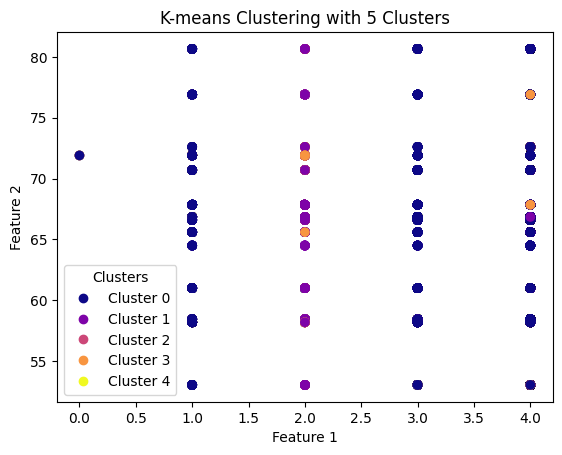

Cluster Distribution:
cluster_label
0    5754
1    3240
3    1421
2     403
4     110
Name: count, dtype: int64


In [ ]:
# Visualizing the clusters if the data has only 2 features or after applying PCA for dimensionality reduction
plt.scatter(cluster_data['featuredLevel'], cluster_data['max_noise'], c=cluster_data['cluster_label'], cmap='plasma')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering with 5 Clusters')
handles, labels = plt.scatter(cluster_data['featuredLevel'], cluster_data['max_noise'], c=cluster_data['cluster_label'], cmap='plasma').legend_elements()
plt.legend(handles=handles, labels=[f'Cluster {i}' for i in range(5)], title="Clusters")
plt.show()

# Optional: Check the distribution of data points in each cluster
print("Cluster Distribution:")
print(cluster_data['cluster_label'].value_counts())

In [ ]:
features_data = cluster_data[['is_commercial', 'cleaned_price_per_month', 'featuredLevel', 'max_noise', 'propertySize_m']]
silhouette_avg = silhouette_score(features_data, cluster_data['cluster_label'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.7880276986919448


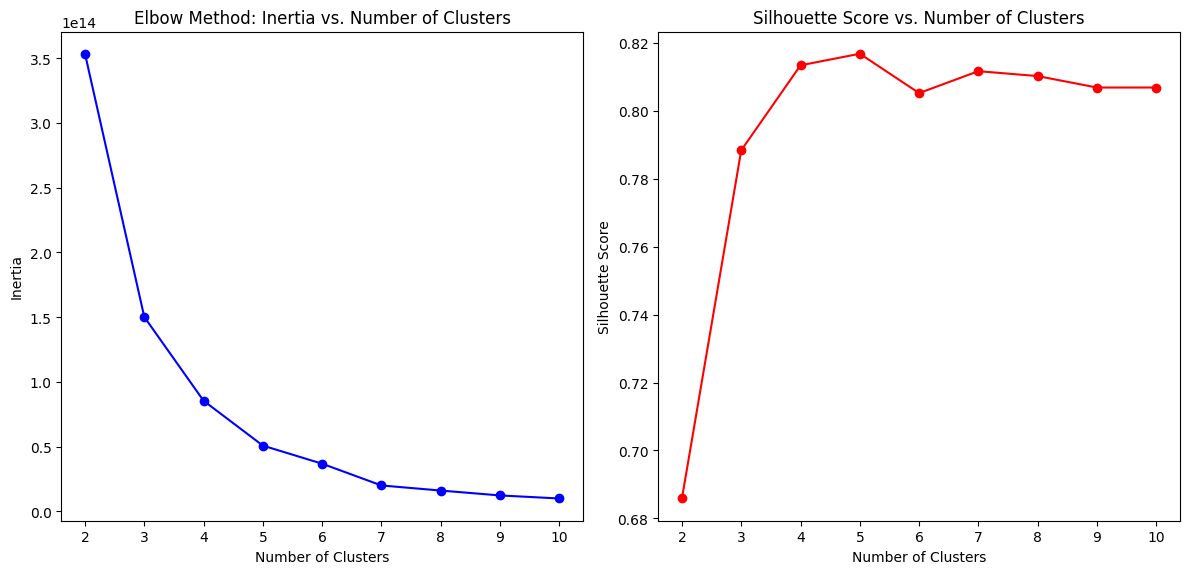

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


X_pca = cluster_data2
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o', color='b')
plt.title("Elbow Method: Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='r')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

Cluster Centers (Centroids):
[[ 2.00000000e-01  2.38376513e+03  3.67407407e+00  6.66835097e+01
   2.24294533e+02 -1.67643677e-14]
 [ 3.49107836e-02  3.73136846e+05  3.76726144e+00  6.71954616e+01
   9.33429015e+01  1.00000000e+00]
 [ 1.79894180e-01  1.47068783e+06  3.73544974e+00  6.46859788e+01
   2.29624339e+02  2.00000000e+00]
 [ 9.85401460e-02  7.16403120e+05  3.75729927e+00  6.50166971e+01
   1.31713504e+02  3.00000000e+00]
 [ 1.00000000e+00  3.40312500e+06  4.00000000e+00  7.15687500e+01
   6.23875000e+02  4.00000000e+00]]


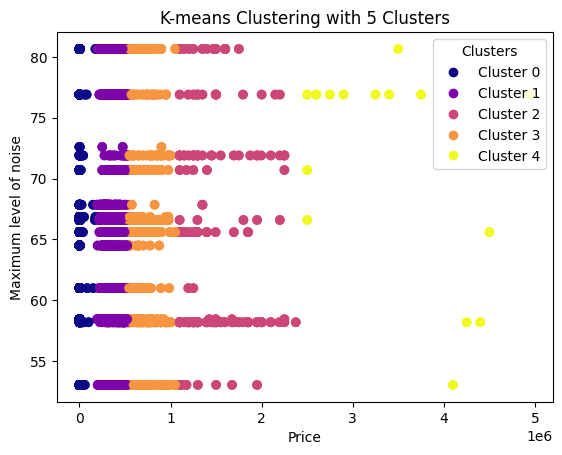

Cluster Distribution:
cluster_label
0    2835
1    1289
3     548
2     189
4      16
Name: count, dtype: int64


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)  # Set the number of clusters to 5
cluster_data2['cluster_label'] = kmeans.fit_predict(cluster_data2)
print("Cluster Centers (Centroids):")
print(kmeans.cluster_centers_)

# Visualizing the clusters if the data has only 2 features or after applying PCA for dimensionality reduction
plt.scatter(cluster_data2['cleaned_price_per_month'], cluster_data2['max_noise'], c=cluster_data2['cluster_label'], cmap='plasma')
plt.xlabel('Price')
plt.ylabel('Maximum level of noise')
plt.title('K-means Clustering with 5 Clusters')
handles, labels = plt.scatter(cluster_data2['cleaned_price_per_month'], cluster_data2['max_noise'], c=cluster_data2['cluster_label'], cmap='plasma').legend_elements()
plt.legend(handles=handles, labels=[f'Cluster {i}' for i in range(5)], title="Clusters")
plt.show()

# Optional: Check the distribution of data points in each cluster
print("Cluster Distribution:")
print(cluster_data2['cluster_label'].value_counts())

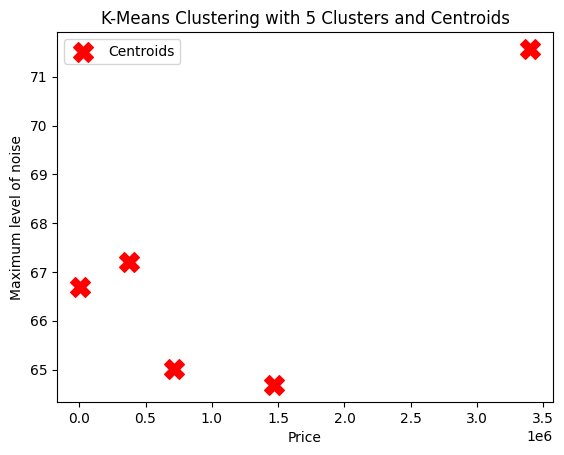

In [ ]:
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], s=200, c='red', marker='X', label='Centroids')  # Cluster centroids

# Customize the plot
plt.title('K-Means Clustering with 5 Clusters and Centroids')
plt.xlabel('Price')
plt.ylabel('Maximum level of noise')
plt.legend()
plt.show()

#Not-needed part

In [ ]:
scaled_cluster_data2 = scaler.fit_transform(cluster_data2[['is_commercial', 'cleaned_price_per_month', 'featuredLevel', 'max_noise', 'propertySize_m']].copy())
scaled_cluster_data2

array([[-0.41481806,  0.20033222,  0.38594704, -1.67082955, -0.01932944],
       [-0.41481806,  1.54266457,  0.38594704, -1.67082955, -0.00630588],
       [-0.41481806,  1.29636506,  0.38594704, -1.00349357, -0.01367447],
       ...,
       [-0.41481806, -0.61051041,  0.38594704, -1.00349357, -0.02755485],
       [ 2.41069544, -0.36615666,  0.38594704, -1.03438876, -0.02070034],
       [ 2.41069544,  1.41951481,  0.38594704,  1.27657102,  0.01357219]])

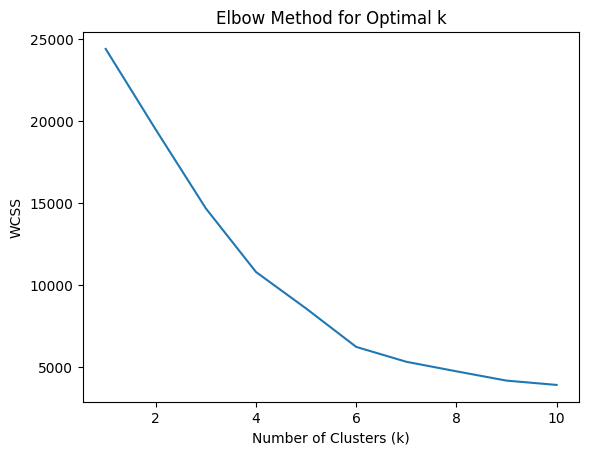

In [ ]:
wcss = []
for k in range(1, 11):  # Try for k values from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_cluster_data2)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

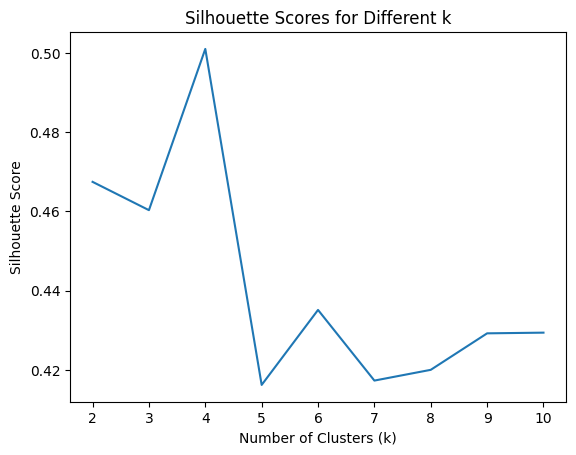

In [ ]:
silhouette_scores = []
for k in range(2, 11):  # Try for k values from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_cluster_data2)
    score = silhouette_score(scaled_cluster_data2, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
scaled_cluster_data = scaler.fit_transform(cluster_data[['is_commercial', 'cleaned_price_per_month', 'featuredLevel', 'max_noise', 'propertySize_m']].copy())
scaled_cluster_data

array([[-0.35400819,  0.11628411,  0.40209072, -1.97058163, -0.01747675],
       [-0.35400819,  1.2021192 ,  0.40209072,  0.65257201, -0.00389916],
       [-0.35400819,  2.99127929,  0.40209072,  0.83091674,  0.02504928],
       ...,
       [ 2.82479339, -0.40442317,  0.40209072, -1.20518552, -0.00671715],
       [ 2.82479339,  0.77025297,  0.40209072,  0.2290033 ,  0.04528757],
       [ 2.82479339, -0.69808974, -3.53522771,  0.65257201, -0.0195262 ]])

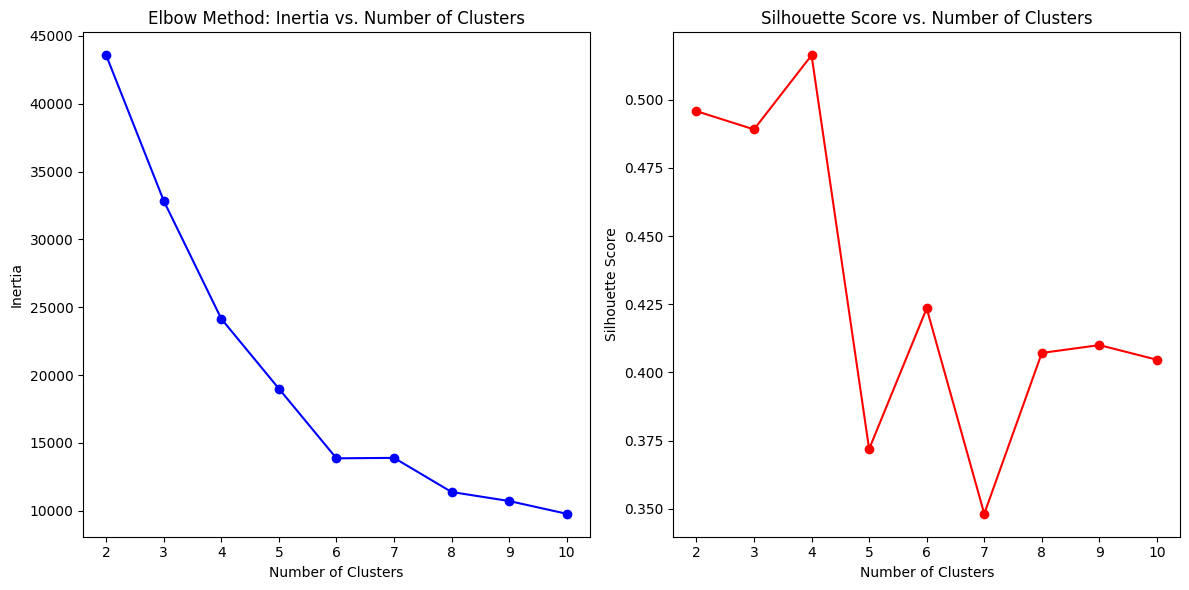

In [ ]:
# Assuming `pca_result` is the PCA-transformed data
# You can try clustering on the reduced PCA data
X_pca = scaled_cluster_data  # or pca.components_ if you have the components

# Apply KMeans for different number of clusters and calculate inertia (within-cluster sum of squares)
inertia = []
silhouette_scores = []
k_range = range(2, 11)  # You can test for 2 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)

    # Inertia (Elbow Method)
    inertia.append(kmeans.inertia_)

    # Silhouette Score
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

# Plot Elbow Method (Inertia)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o', color='b')
plt.title("Elbow Method: Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='r')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)  # Set the number of clusters to 5
cluster_data['cluster_label'] = kmeans.fit_predict(scaled_cluster_data)
print("Cluster Centers (Centroids):")
print(kmeans.cluster_centers_)

Cluster Centers (Centroids):
[[-1.94300287e-01  1.78177033e-01 -2.84033222e+00  1.03874153e-02
  -1.04081391e-02]
 [ 2.82479339e+00 -1.99765141e-01  3.50224553e-01  9.67258525e-02
   1.51000410e-02]
 [ 2.82479339e+00 -6.97034579e-01  4.02090718e-01 -7.89047834e-01
   1.03637935e+02]
 [-3.54008192e-01  5.59239572e-03  2.90064204e-01 -1.40411113e-02
  -1.26537533e-02]]


In [ ]:
features_data = cluster_data[['is_commercial', 'cleaned_price_per_month', 'featuredLevel', 'max_noise', 'propertySize_m']]
silhouette_avg = silhouette_score(features_data, cluster_data['cluster_label'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: -0.12736798409159356


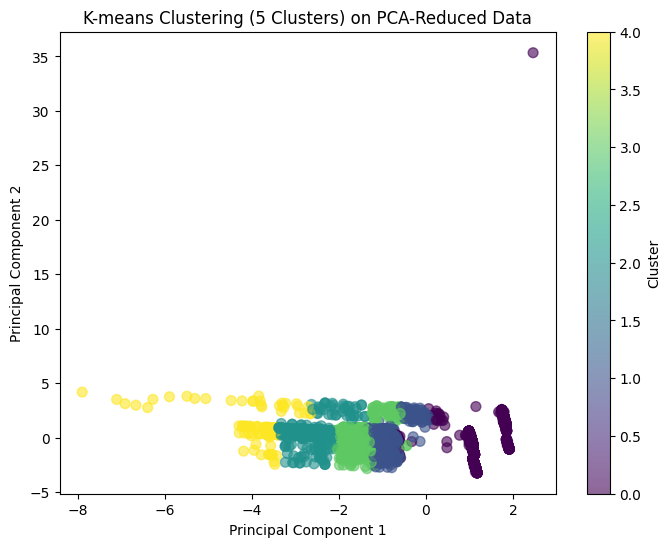

,is_commercial,cleaned_price_per_month,featuredLevel,max_noise,propertySize_m
Cluster,,,,,
0,0.171707,2.766715e+03,3.669621,66.248445,143.446124
1,0.027160,3.784619e+05,3.730247,66.345324,95.025000
2,0.101737,1.368871e+06,3.702233,67.419479,246.677419
3,0.047854,7.377140e+05,3.707952,66.017840,143.308234
4,0.290909,2.265682e+06,3.654545,68.113636,475.400000


Cluster centers in PCA space:
[[1.71706639e-01 2.76671471e+03 3.66962113e+00 6.62484446e+01
  1.43446124e+02]
 [2.71604938e-02 3.78461943e+05 3.73024691e+00 6.63453241e+01
  9.50250000e+01]
 [1.01736973e-01 1.36887097e+06 3.70223325e+00 6.74194789e+01
  2.46677419e+02]
 [4.78536242e-02 7.37714046e+05 3.70795215e+00 6.60178395e+01
  1.43308234e+02]
 [2.90909091e-01 2.26568182e+06 3.65454545e+00 6.81136364e+01
  4.75400000e+02]]
Cluster distribution:
0    5754
1    3240
3    1421
2     403
4     110
Name: count, dtype: int64


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(cluster_data)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the original data (optional)
data_with_labels = cluster_data.copy()
data_with_labels['Cluster'] = cluster_labels

# Step 4: Visualize the clustering result (optional, if you have more than 2 or 3 PCs)
# If you reduced the data to 2D or 3D with PCA, you can use this visualization.
# For this example, let's assume you used the first 2 principal components.

# If you want to visualize based on the first 2 PCs:
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.6)
plt.title("K-means Clustering (5 Clusters) on PCA-Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()

# Step 5: Analyze the clustering results (Optional)
# You can check the cluster centers or group data points by clusters:
print("Cluster centers in PCA space:")
print(kmeans.cluster_centers_)

# You can also look at the distribution of the clusters:
cluster_distribution = pd.Series(cluster_labels).value_counts()
print("Cluster distribution:")
print(cluster_distribution)

# Optionally, show the original features associated with the clusters
# (This step can be useful to interpret the clusters based on original features)
data_with_labels.groupby('Cluster').mean()

In [ ]:
from sklearn.metrics import silhouette_score
features_data = data_with_labels[['is_commercial', 'cleaned_price_per_month', 'featuredLevel', 'max_noise', 'propertySize_m']]
silhouette_avg = silhouette_score(features_data, data_with_labels['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.7880276986919448


In [ ]:
initial_data55[initial_data55['to_monitor_km'] < 2]

,is_commercial,to_monitor_km,sph_dist,cleaned_price_per_month,sections_2,featuredLevel,max_noise,propertySize_m,Sale_Type
0,0,1.26,3.40,330000.0,1,4,53.05,68.0,0
6,0,1.64,4.97,875000.0,5,4,53.05,144.0,0
12,0,1.12,7.60,775000.0,5,4,58.45,101.0,0
14,0,0.55,1.15,2000000.0,5,4,58.20,250.0,0
15,0,1.01,0.65,750.0,5,4,58.20,10.0,1
...,...,...,...,...,...,...,...,...,...
10926,0,1.04,5.31,850.0,5,4,61.00,20.0,1
10927,0,1.55,0.76,950.0,5,4,76.90,20.0,1
10930,0,0.70,6.38,790.0,5,4,58.45,20.0,1
10934,1,0.52,0.96,100000.0,12,4,58.20,60.0,0


##Modeling the first variant

Firstly, all kind of meaningful variables are contributing in the clustering process

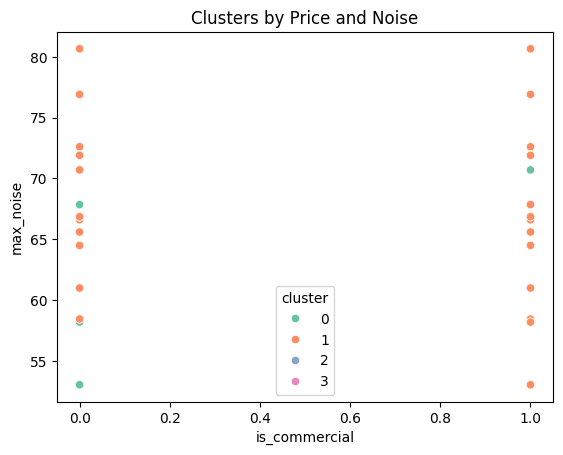

In [ ]:

# Select relevant features
features = initial_data5[['cleaned_price_per_month', 'max_noise', 'featuredLevel',
                 'to_monitor_km', 'propertySize_m', 'Ber_Rating', 'is_commercial']]

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
initial_data5['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
sns.scatterplot(x=initial_data5['is_commercial'], y=initial_data5['max_noise'], hue=initial_data5['cluster'], palette="Set2")
plt.title("Clusters by Price and Noise")
plt.show()

##Second Variant

In [ ]:
initial_data5

,Unnamed: 0,id,title,seoTitle,sections,saleType,featuredLevel,featuredLevelFull,publishDate,price,...,longitude,sph_dist,monitor,to_monitor_km,max_noise,days_on_site,number_of_posts,Sale_Type,Ber_Rating,is_commercial


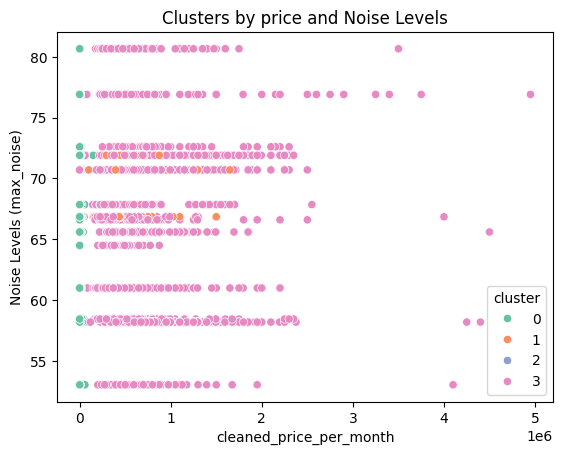

         Sale_Type  featuredLevel  numBedrooms  shared_or_not  \
cluster                                                         
0         1.000000       3.667444     2.114322       0.054200   
1         0.340686       3.740196     2.909314       0.004902   
2         1.000000       4.000000     0.000000       0.000000   
3         0.000000       3.719224     2.739034       0.000000   

         number_of_posts  propertySize_m  cleaned_price_per_month   sph_dist  \
cluster                                                                        
0              46.568378       73.597452              1840.035217   6.342098   
1              48.754902      115.926471            327803.629096  24.240711   
2               1.000000   404686.000000               428.571429   6.010000   
3             104.621791      126.651910            595777.450172   7.187762   

         days_on_site  Ber_Rating  is_commercial  sections_2  to_monitor_km  \
cluster                                          

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data
features = initial_data5[['max_noise', 'to_monitor_km', 'propertySize_m', 'cleaned_price_per_month', 'Sale_Type']]

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)  # Choose 3 clusters as an example
initial_data5['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters (2D scatter plot)
sns.scatterplot(x=initial_data5['cleaned_price_per_month'], y=initial_data5['max_noise'], hue=initial_data5['cluster'], palette="Set2")
plt.title("Clusters by price and Noise Levels")
plt.xlabel("cleaned_price_per_month")
plt.ylabel("Noise Levels (max_noise)")
plt.show()

# Analyze clusters
print(initial_data5.groupby('cluster').mean())  # Check average feature values for each cluster

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_features, initial_data5['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.43906652864266676


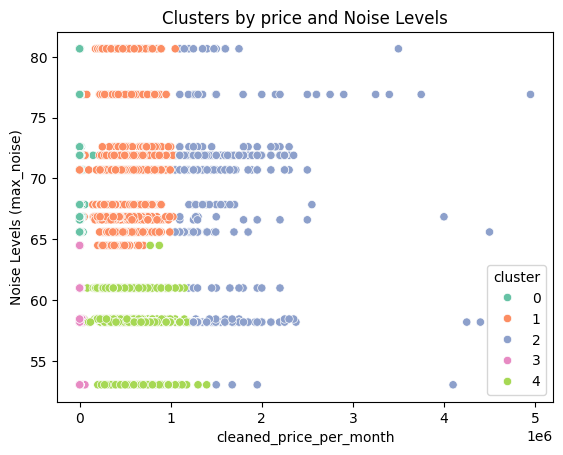

         Sale_Type  featuredLevel  numBedrooms  shared_or_not  \
cluster                                                         
0              1.0       3.669344     2.120742       0.060371   
1              0.0       3.707951     2.598036       0.000000   
2              0.0       3.674322     3.720251       0.000000   
3              1.0       3.670633     2.148501       0.040933   
4              0.0       3.756962     2.760759       0.000000   

         number_of_posts  propertySize_m  cleaned_price_per_month  sph_dist  \
cluster                                                                       
0              46.261977       70.944891             1.879057e+03  7.379474   
1             107.771935      109.479252             4.745832e+05  9.079512   
2              48.283925      302.688935             1.588914e+06  6.838706   
3              45.762970      269.034745             1.734465e+03  5.750581   
4             107.830380      111.758228             5.199553e+05  6.4

In [ ]:
# Load and prepare data
features = initial_data5[['max_noise', 'cleaned_price_per_month', 'Sale_Type']]

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means
kmeans = KMeans(n_clusters=5, random_state=42)  # Choose 3 clusters as an example
initial_data5['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters (2D scatter plot)
sns.scatterplot(x=initial_data5['cleaned_price_per_month'], y=initial_data5['max_noise'], hue=initial_data5['cluster'], palette="Set2")
plt.title("Clusters by price and Noise Levels")
plt.xlabel("cleaned_price_per_month")
plt.ylabel("Noise Levels (max_noise)")
plt.show()

# Analyze clusters
print(initial_data5.groupby('cluster').mean())  # Check average feature values for each cluster

In [ ]:

silhouette_avg = silhouette_score(scaled_features, initial_data5['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5677828869319927


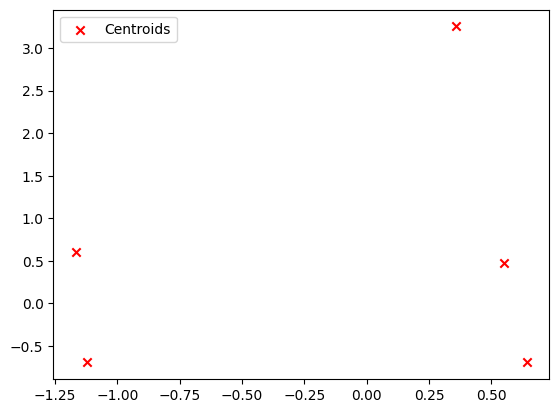

In [ ]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', label='Centroids')
plt.legend()

Text(0.5, 1.0, 'Price Distribution by Cluster')

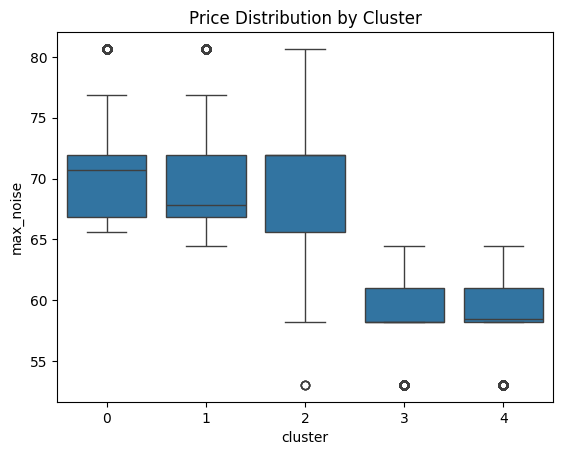

In [ ]:
sns.boxplot(x='cluster', y='max_noise', data=initial_data5)
plt.title("Price Distribution by Cluster")

In [ ]:
cluster_summary = initial_data5.groupby('cluster').mean()
print(cluster_summary)

         Sale_Type  featuredLevel  numBedrooms  shared_or_not  \
cluster                                                         
0         0.627524       3.695258     2.228727       0.034037   
1         0.085187       3.686701     3.253195       0.001893   
2         1.000000       4.000000     0.000000       0.000000   

         number_of_posts  propertySize_m  cleaned_price_per_month   sph_dist  \
cluster                                                                        
0              75.034944       82.239846            159189.694221   6.295073   
1              64.163275      169.932797            798963.387618  11.974193   
2               1.000000   404686.000000               428.571429   6.010000   

         days_on_site  Ber_Rating  is_commercial  sections_2  to_monitor_km  \
cluster                                                                       
0           37.448378    7.675743       0.122646    4.460177       2.910206   
1           49.517274    7.971131   

In [ ]:
initial_data5.to_csv('initial_data5_first_try', index = False)

In [ ]:
#1)decrease the sample (only consider the filter to_monitor_km < 3 km)
#2)choose the clusters order
#3)extra class models

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust 'eps' and 'min_samples' as needed
data['dbscan_cluster'] = dbscan.fit_predict(scaled_features)

# Visualize clusters
sns.scatterplot(x=data['sph_dist'], y=data['max_noise'], hue=data['dbscan_cluster'], palette="Set1")
plt.title("DBSCAN Clusters by Accessibility and Noise Levels")
plt.xlabel("Distance to Key Point (sph_dist)")
plt.ylabel("Noise Levels (max_noise)")
plt.show()

# Analyze clusters
print(data.groupby('dbscan_cluster').mean())  # Analyze cluster characteristics